In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


#from sklearn.model_selection import cross_val_score
# For Prediction
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# For Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
#Reading the dataset
air_quality_data = pd.read_csv(r"/content/drive/MyDrive/Air/Data.csv", encoding= "unicode_escape")

In [3]:
df = air_quality_data

#EDA



In [4]:
#Loading the dataset
df.head()

,stn_code,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,150.0,Ahmedabad,01-01-2015 01:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0
1,151.0,Ahmedabad,01-01-2015 02:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0
2,152.0,Ahmedabad,01-01-2015 03:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0
3,150.0,Ahmedabad,01-01-2015 04:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0
4,151.0,Ahmedabad,01-01-2015 05:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0


In [5]:
#To get the number of rows and columns
df.shape

(707876, 15)

In [6]:
#To get the data type of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707876 entries, 0 to 707875
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   stn_code  291665 non-null  object 
 1   City      707875 non-null  object 
 2   Datetime  707875 non-null  object 
 3   PM2.5     562787 non-null  float64
 4   PM10      411138 non-null  float64
 5   NO        591243 non-null  float64
 6   NO2       590753 non-null  float64
 7   NOx       584651 non-null  float64
 8   NH3       435333 non-null  float64
 9   CO        621358 non-null  float64
 10  SO2       577502 non-null  float64
 11  O3        578667 non-null  float64
 12  Benzene   544229 non-null  float64
 13  Toluene   487268 non-null  float64
 14  Xylene    252046 non-null  float64
dtypes: float64(12), object(3)
memory usage: 81.0+ MB


**Features**

City

Date

PM2.5 (Particulate Matter 2.5-micrometer)

PM10 (Particulate Matter 10-micrometer)

SO2 (Sulphur Dioxide)

NOx (Any Nitric x-oxide)

NH3 (Ammonia)

CO (Carbon Monoxide)

O3 (Ozone or Trioxygen)

Benzene

Toluene

Xylene

In [7]:
#To get the total number of missing values
df.isnull().sum()

stn_code    416211
City             1
Datetime         1
PM2.5       145089
PM10        296738
NO          116633
NO2         117123
NOx         123225
NH3         272543
CO           86518
SO2         130374
O3          129209
Benzene     163647
Toluene     220608
Xylene      455830
dtype: int64

In [8]:
#To get the descriptive stats of the numeric values present in the dataset
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
count,562787.000000,411138.000000,591243.000000,590753.000000,584651.000000,435333.000000,621358.000000,577502.000000,578667.000000,544229.000000,487268.000000,252046.000000
mean,67.622994,119.075804,17.421755,28.885157,32.287565,23.607959,2.183539,14.038307,34.798979,3.087595,8.660927,3.130537
std,74.730496,104.224752,32.095211,29.162194,39.756669,28.831900,10.970514,19.305540,29.806379,16.456599,21.741023,7.834832
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000
25%,26.200000,52.380000,3.840000,10.810000,10.660000,8.120000,0.420000,4.880000,13.420000,0.050000,0.370000,0.100000
50%,46.420000,91.500000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000
75%,79.490000,147.520000,16.150000,36.350000,37.150000,29.230000,1.370000,14.780000,47.620000,2.750000,8.410000,3.120000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000


In [9]:
#To get the unique values 
print("City :",df['City'].nunique())
print("station code :",df['stn_code'].nunique())

City : 26
station code : 803


#Data Visualization

Major parameters on which AQI is measured are:
 SO2, NOx, O3, NO2, PM2.5, PM10, NO, NH3, CO

In [ ]:
sns.set()
cols = ['SO2', 'NOx', 'O3', 'NO2', 'PM2.5', 'PM10', 'NO', 'NH3', 'CO']
sns.pairplot(df[cols], size = 2.5)
plt.show()

In [ ]:
# Distribution of the data
df.hist(bins = 20, color = 'orange', figsize = (20, 14))


In [ ]:
#To get the count of values present in the City column
df["City"].value_counts()

In [ ]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df['City'].value_counts().plot(kind='bar')
plt.xlabel("City")
plt.ylabel("Frequency")
plt.show()


In [ ]:
plt.rcParams["figure.figsize"]=(30,10)

In [ ]:
#Bar shows the increasing order of City based on SO2 level
df[["SO2","City"]].groupby(["City"]).mean().sort_values(by="SO2").plot.bar(color="teal")
plt.show

In [ ]:
#Bar shows the increasing order of City based on NO2 level
df[["NO2","City"]].groupby(["City"]).mean().sort_values(by="NO2").plot.bar(color="teal")
plt.show

In [ ]:
#Bar shows the increasing order of City based on NO level
df[["NO","City"]].groupby(["City"]).mean().sort_values(by="NO").plot.bar(color="teal")
plt.show

In [ ]:
#Bar shows the increasing order of City based on NH3 level
df[["NH3","City"]].groupby(["City"]).mean().sort_values(by="NH3").plot.bar(color="teal")
plt.show

In [ ]:
#Bar shows the increasing order of City based on O3 level
df[["O3","City"]].groupby(["City"]).mean().sort_values(by="O3").plot.bar(color="teal")
plt.show

In [ ]:
#Bar shows the increasing order of City based on CO level
df[["CO","City"]].groupby(["City"]).mean().sort_values(by="CO").plot.bar(color="teal")
plt.show

In [ ]:
#Bar shows the increasing order of City based on NOx level
df[["NOx","City"]].groupby(["City"]).mean().sort_values(by="NOx").plot.bar(color="teal")
plt.show

In [ ]:
# TOP 10  City which higest PM 2.5
df.groupby(['City']).count()['PM2.5']

In [ ]:
#Bar shows the increasing order of City based on PM2.5 level
df[["PM2.5","City"]].groupby(["City"]).mean().sort_values(by="PM2.5").plot.bar(color="teal")
plt.show

In [ ]:
#Bar shows the increasing order of City based on PM10 level
df[["PM10","City"]].groupby(["City"]).mean().sort_values(by="PM10").plot.bar(color="teal")
plt.show

In [ ]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene']
df = df[pollutants]

print('Distribution of different pollutants in last 5 years')
df.plot(kind='line',figsize=(18,18),cmap='coolwarm',subplots=True,fontsize=10);

In [ ]:
# Select specific columns using loc
new_df = air_quality_data.loc[:, ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene']]

# Display the new DataFrame

for col in new_df.columns:
    sns.boxplot(data=new_df[col],width=0.5)
    plt.title(col)
    plt.show()



#Checking all null values and treating those null values

In [10]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
nullvalues

Xylene      455830
stn_code    416211
PM10        296738
NH3         272543
Toluene     220608
Benzene     163647
PM2.5       145089
SO2         130374
O3          129209
NOx         123225
NO2         117123
NO          116633
CO           86518
City             1
Datetime         1
dtype: int64

In [11]:
null_values_percentage = ((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

In [12]:
#Concatenating total null values and their percentage of missing values for further imputation or column deletion
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage],axis=1, keys=["Total","Percent"])

missing_data_with_percentage

,Total,Percent
Xylene,455830,64.394046
stn_code,416211,58.797162
PM10,296738,41.919489
NH3,272543,38.501517
Toluene,220608,31.164780
Benzene,163647,23.118032
PM2.5,145089,20.496386
SO2,130374,18.417632
O3,129209,18.253056
NOx,123225,17.407710


In [13]:
df_drop = df

In [14]:
#Droping Unnecessary columns
df_drop.drop(['stn_code'],axis=1,inplace=True)
df_drop.drop(['City'],axis=1,inplace=True)
df_drop.drop(["Datetime"],axis=1,inplace=True)
df_drop.drop(["Benzene"],axis=1,inplace=True)
df_drop.drop(["Toluene"],axis=1,inplace=True)
df_drop.drop(["Xylene"],axis=1,inplace=True)

In [15]:
#Checking the remaining null values
df_drop.isnull().sum()

PM2.5    145089
PM10     296738
NO       116633
NO2      117123
NOx      123225
NH3      272543
CO        86518
SO2      130374
O3       129209
dtype: int64

In [16]:
df_FillNA = df_drop

In [17]:
#Replace null values of "numeric column" dataset from their "mean"

df_FillNA['PM2.5']=df_FillNA['PM2.5'].fillna((df_FillNA['PM2.5'].mean()))
df_FillNA['PM10']=df_FillNA['PM10'].fillna((df_FillNA['PM10'].mean()))
df_FillNA['NO']=df_FillNA['NO'].fillna((df_FillNA['NO'].mean()))
df_FillNA['NO2']=df_FillNA['NO2'].fillna((df_FillNA['NO2'].mean()))
df_FillNA['NOx']=df_FillNA['NOx'].fillna((df_FillNA['NOx'].mean()))
df_FillNA['NH3']=df_FillNA['NH3'].fillna((df_FillNA['NH3'].mean()))
df_FillNA['CO']=df_FillNA['CO'].fillna((df_FillNA['CO'].mean()))
df_FillNA['SO2']=df_FillNA['SO2'].fillna((df_FillNA['SO2'].mean()))
df_FillNA['O3']=df_FillNA['O3'].fillna((df_FillNA['O3'].mean()))

In [18]:
df_FillNA.isnull().sum()

PM2.5    0
PM10     0
NO       0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
dtype: int64

array([[<AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'NO'}>],
       [<AxesSubplot:title={'center':'NO2'}>,
        <AxesSubplot:title={'center':'NOx'}>,
        <AxesSubplot:title={'center':'NH3'}>],
       [<AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'SO2'}>,
        <AxesSubplot:title={'center':'O3'}>]], dtype=object)

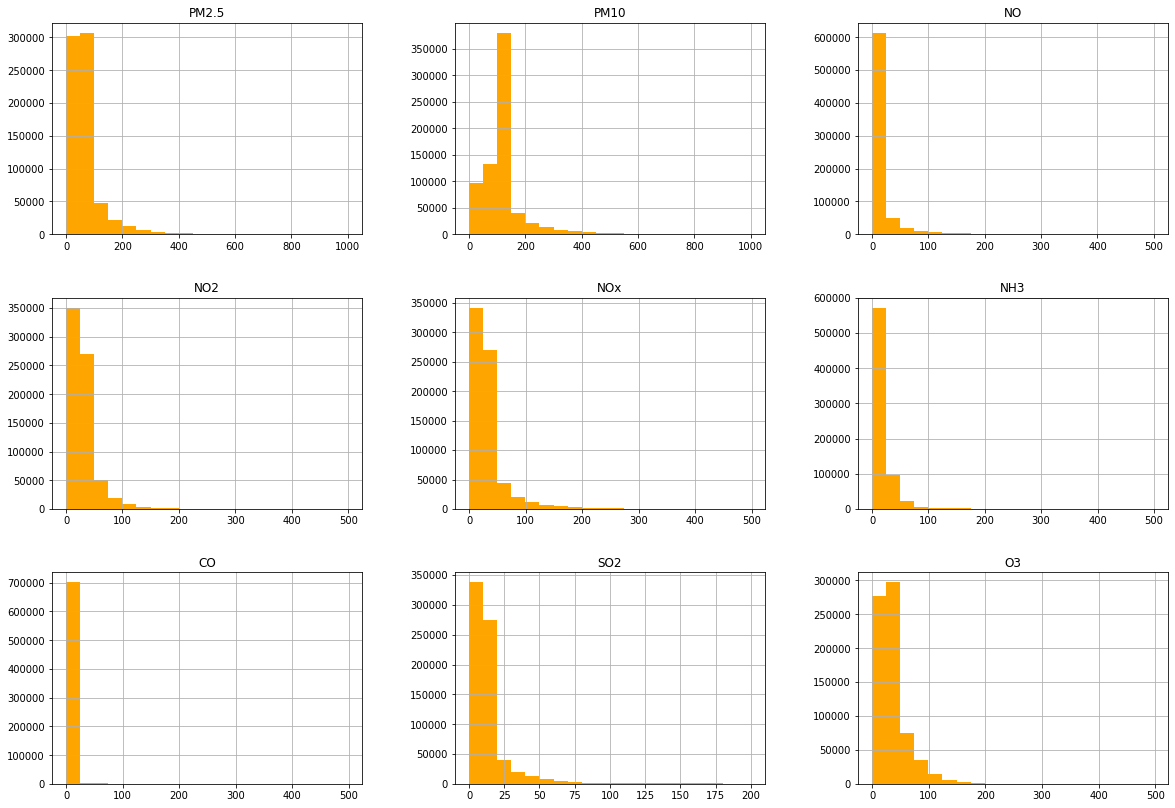

In [19]:
# Distribution of the data
df_FillNA.hist(bins = 20, color = 'orange', figsize = (20, 14))

In [20]:
df_iqr = df_FillNA

In [21]:
def outlier_imputation_IQR( df_iqr,col):
    q1, q3 =  df_iqr[col].quantile([0.25,0.75])
    iqr = q3 -q1

    df_iqr.loc[ df_iqr[col] < (q1-1.5*iqr),col ] = (q1-1.5*iqr) 
    df_iqr.loc[ df_iqr[col] > (q3+1.5*iqr),col ] = (q3+1.5*iqr)
    return  df_iqr

In [22]:
for col in  df_iqr.columns:
    df_iqr = outlier_imputation_IQR(df_iqr,col)

array([[<AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'NO'}>],
       [<AxesSubplot:title={'center':'NO2'}>,
        <AxesSubplot:title={'center':'NOx'}>,
        <AxesSubplot:title={'center':'NH3'}>],
       [<AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'SO2'}>,
        <AxesSubplot:title={'center':'O3'}>]], dtype=object)

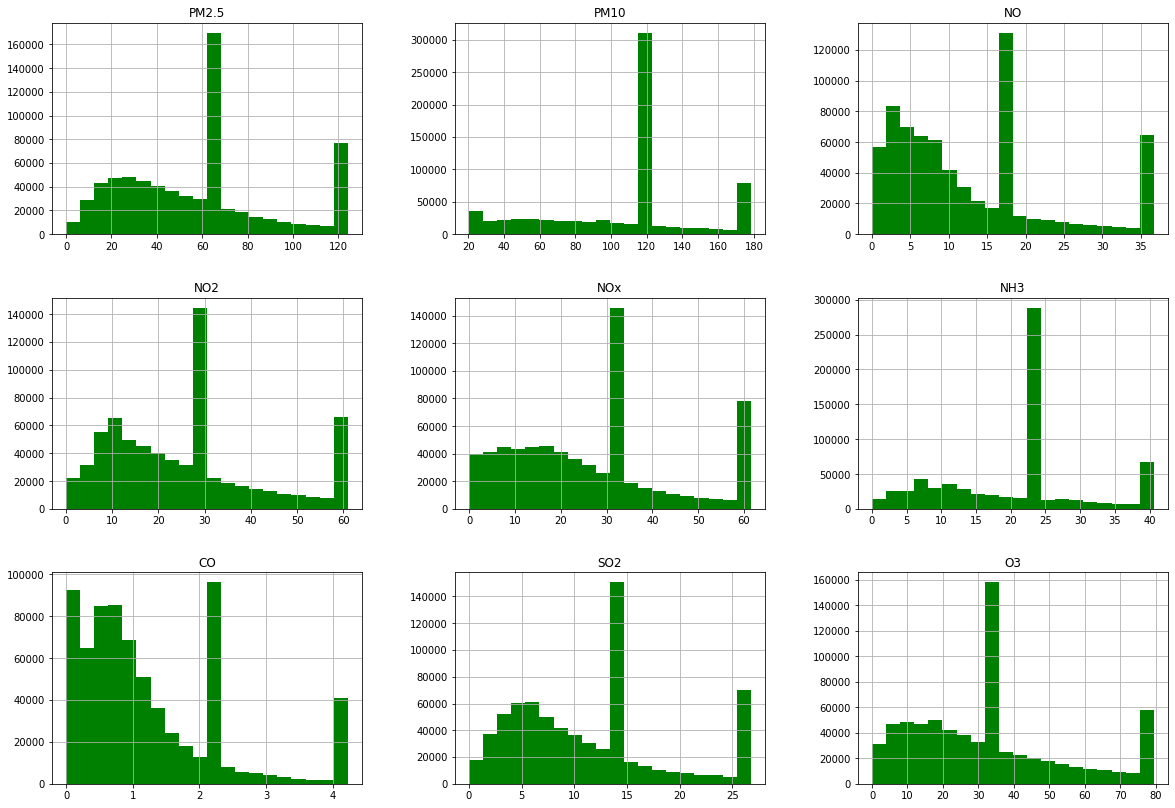

In [23]:
# Distribution of the data
df_iqr.hist(bins = 20, color = 'green', figsize = (20, 14))

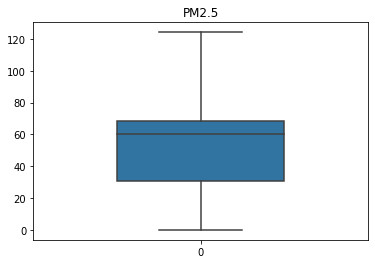

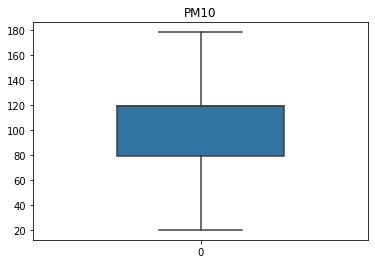

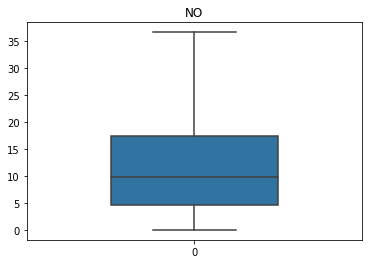

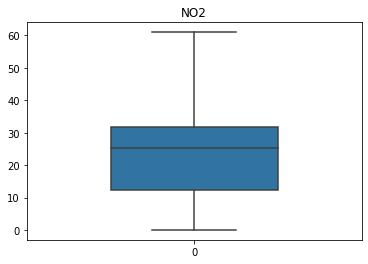

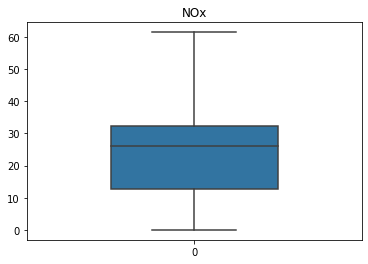

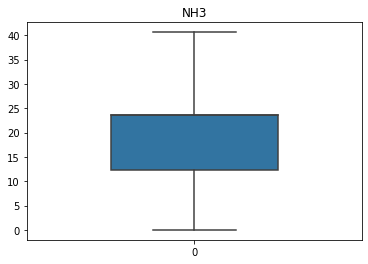

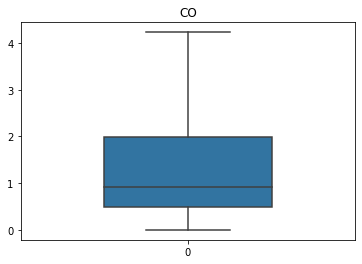

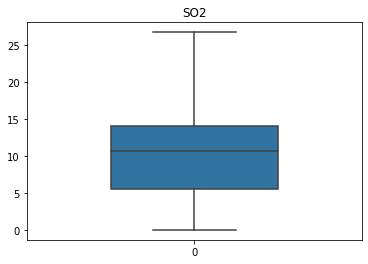

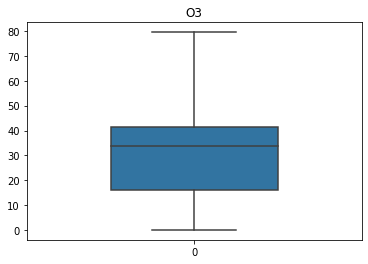

In [24]:
# Select specific columns using loc
df_iqr = df_iqr.loc[:, ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3']]

# Display the new DataFrame

for col in df_iqr.columns:
    sns.boxplot(data=df_iqr[col],width=0.5)
    plt.title(col)
    plt.show()

In [25]:
df_normalized = df_iqr

In [26]:
# saving the dataframe
df_normalized.to_csv(r'/content/drive/MyDrive/Air/preair.csv')

#Coorelation Between features

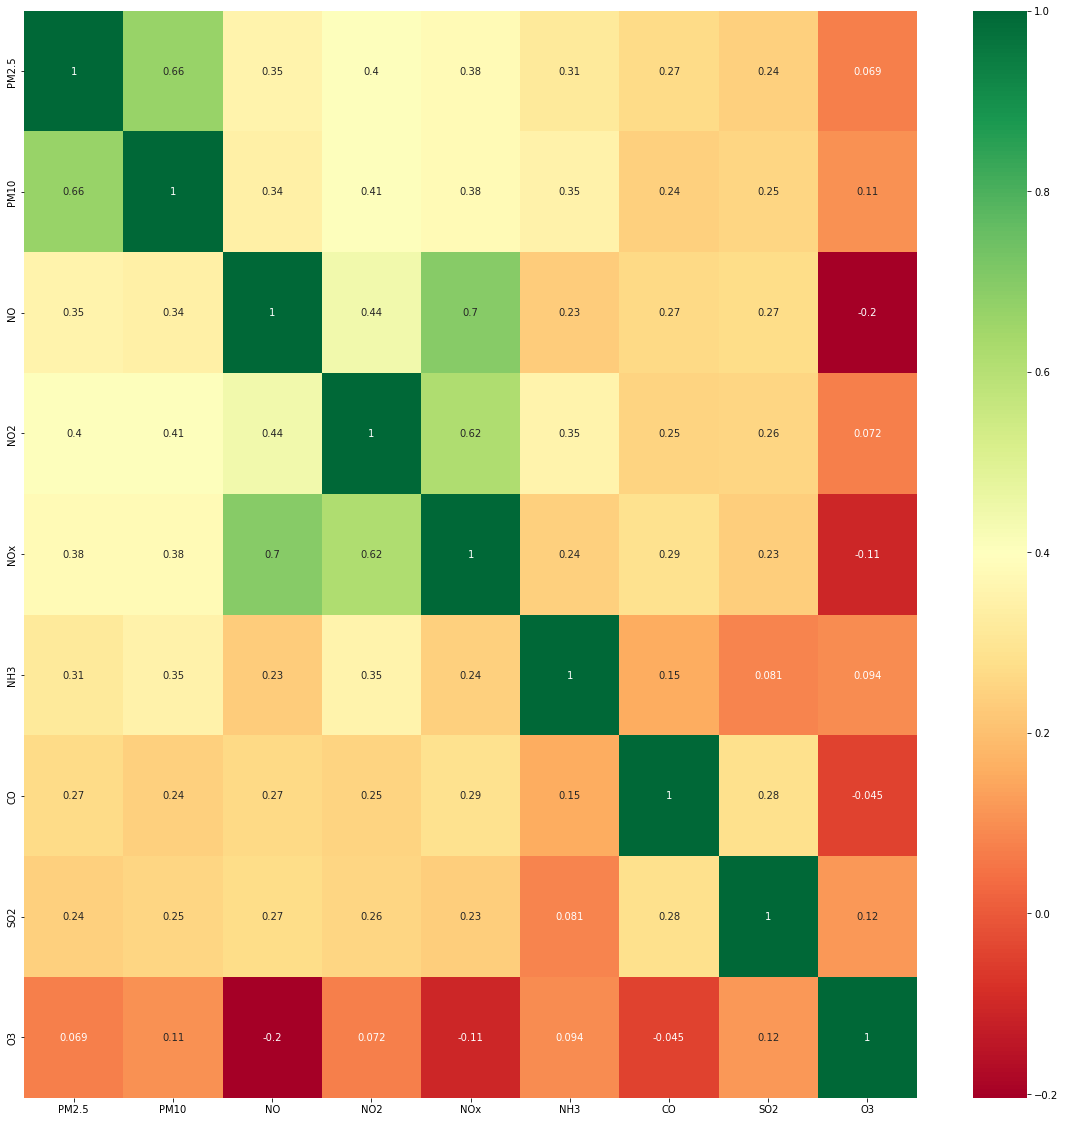

In [ ]:
#Heatmap of features to see correlation between them
corrmap = df_iqr.corr()
corr_features = corrmap.index
plt.figure(figsize=(20,20))
map=sns.heatmap(df_iqr[corr_features].corr(),annot=True,cmap="RdYlGn")

#Calculate Sub-Index of different parameters

***The AQI calculation uses 7 measures: PM2.5, PM10, SO2, NOx, NH3, CO and O3.***

In [ ]:
df_index = df_iqr

In [ ]:
# PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df_index["PM2.5_SubIndex"] = df_index["PM2.5"].astype(int).apply(lambda x: get_PM25_subindex(x))

In [ ]:
# PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x > 50 and x <= 100:
        return x
    elif x > 100 and x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x > 250 and x <= 350:
        return 200 + (x - 250)
    elif x > 350 and x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df_index["PM10_SubIndex"] = df_index["PM10"].astype(int).apply(lambda x: get_PM10_subindex(x))

In [ ]:
# SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df_index["SO2_SubIndex"] = df_index["SO2"].astype(int).apply(lambda x: get_SO2_subindex(x))

In [ ]:
# NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df_index["NOx_SubIndex"] = df_index["NOx"].astype(int).apply(lambda x: get_NOx_subindex(x))

In [ ]:
# NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x > 200 and x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x > 400 and x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x > 800 and x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x > 1200 and x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df_index["NH3_SubIndex"] = df_index["NH3"].astype(int).apply(lambda x: get_NH3_subindex(x))

In [ ]:
# CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df_index["CO_SubIndex"] = df_index["CO"].astype(int).apply(lambda x: get_CO_subindex(x))

In [ ]:
# O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df_index["O3_SubIndex"] = df_index["O3"].astype(int).apply(lambda x: get_O3_subindex(x))

In [ ]:
df_index

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
0,67.622994,119.075804,1.00,40.01,36.37,23.607959,1.00,26.755769,34.798979,123.333333,112.666667,32.50,45.00,5.75,50.0,34.0
1,67.622994,119.075804,0.02,27.75,19.73,23.607959,0.02,26.755769,34.798979,123.333333,112.666667,32.50,23.75,5.75,0.0,34.0
2,67.622994,119.075804,0.08,19.32,11.08,23.607959,0.08,26.755769,34.798979,123.333333,112.666667,32.50,13.75,5.75,0.0,34.0
3,67.622994,119.075804,0.30,16.45,9.20,23.607959,0.30,26.755769,79.525000,123.333333,112.666667,32.50,11.25,5.75,0.0,79.0
4,67.622994,119.075804,0.12,14.90,7.85,23.607959,0.12,26.755769,34.798979,123.333333,112.666667,32.50,8.75,5.75,0.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707871,9.500000,36.000000,2.75,25.57,15.85,4.570000,0.62,14.038307,27.750000,15.000000,36.000000,17.50,18.75,1.00,0.0,27.0
707872,17.250000,49.250000,3.62,33.20,20.62,3.780000,0.76,2.020000,25.580000,28.333333,49.000000,2.50,25.00,0.75,0.0,25.0
707873,36.000000,71.000000,2.20,30.80,18.20,3.670000,0.58,1.770000,26.150000,60.000000,71.000000,1.25,22.50,0.75,0.0,26.0
707874,15.750000,63.000000,1.02,28.90,16.00,3.800000,0.49,0.750000,15.820000,25.000000,63.000000,0.00,20.00,0.75,0.0,15.0


#Calculate Air Quality Index (AQI)

In [ ]:
#df_range is used for creating range
df_range = df_index

In [ ]:
df_range["AQI_calculated"] = round(df_range[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                 "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
df_range.loc[df_range["PM2.5_SubIndex"] + df_range["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
df_range.tail(50)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,AQI_calculated
707826,26.50,56.25,1.50,20.38,11.38,4.82,0.27,3.450000,27.32,43.333333,56.0,3.75,13.75,1.00,0.0,27.0,56.0
707827,32.50,75.25,2.00,30.65,17.92,7.17,0.50,5.400000,16.53,53.333333,75.0,6.25,21.25,1.75,0.0,16.0,75.0
707828,26.25,77.25,3.10,39.05,23.27,10.18,0.50,13.400000,20.02,43.333333,77.0,16.25,28.75,2.50,0.0,20.0,77.0
707829,24.00,85.25,6.85,45.08,29.52,13.15,0.63,13.300000,14.03,40.000000,85.0,16.25,36.25,3.25,0.0,14.0,85.0
707830,33.75,97.00,6.07,45.30,29.02,16.92,0.57,18.050000,13.00,55.000000,97.0,22.50,36.25,4.00,0.0,13.0,97.0
707831,34.00,99.50,5.00,39.35,25.00,17.12,0.42,17.400000,25.23,56.666667,99.0,21.25,31.25,4.25,0.0,25.0,99.0
707832,28.00,103.75,6.90,36.83,25.20,7.85,0.12,10.820000,24.40,46.666667,102.0,12.50,31.25,1.75,0.0,24.0,102.0
707833,29.75,71.25,10.72,39.05,29.50,5.58,0.40,3.700000,10.47,48.333333,71.0,3.75,36.25,1.25,0.0,10.0,71.0
707834,36.75,89.75,9.10,38.33,27.82,7.78,0.53,6.430000,33.20,60.000000,89.0,7.50,33.75,1.75,0.0,33.0,89.0
707835,42.00,103.00,8.90,45.20,31.27,7.23,0.65,9.780000,15.10,70.000000,102.0,11.25,38.75,1.75,0.0,15.0,102.0


#Calculate AQI Bucket on the basis of AQI value

In [ ]:
#df_class is used for classification
df_class = df_range

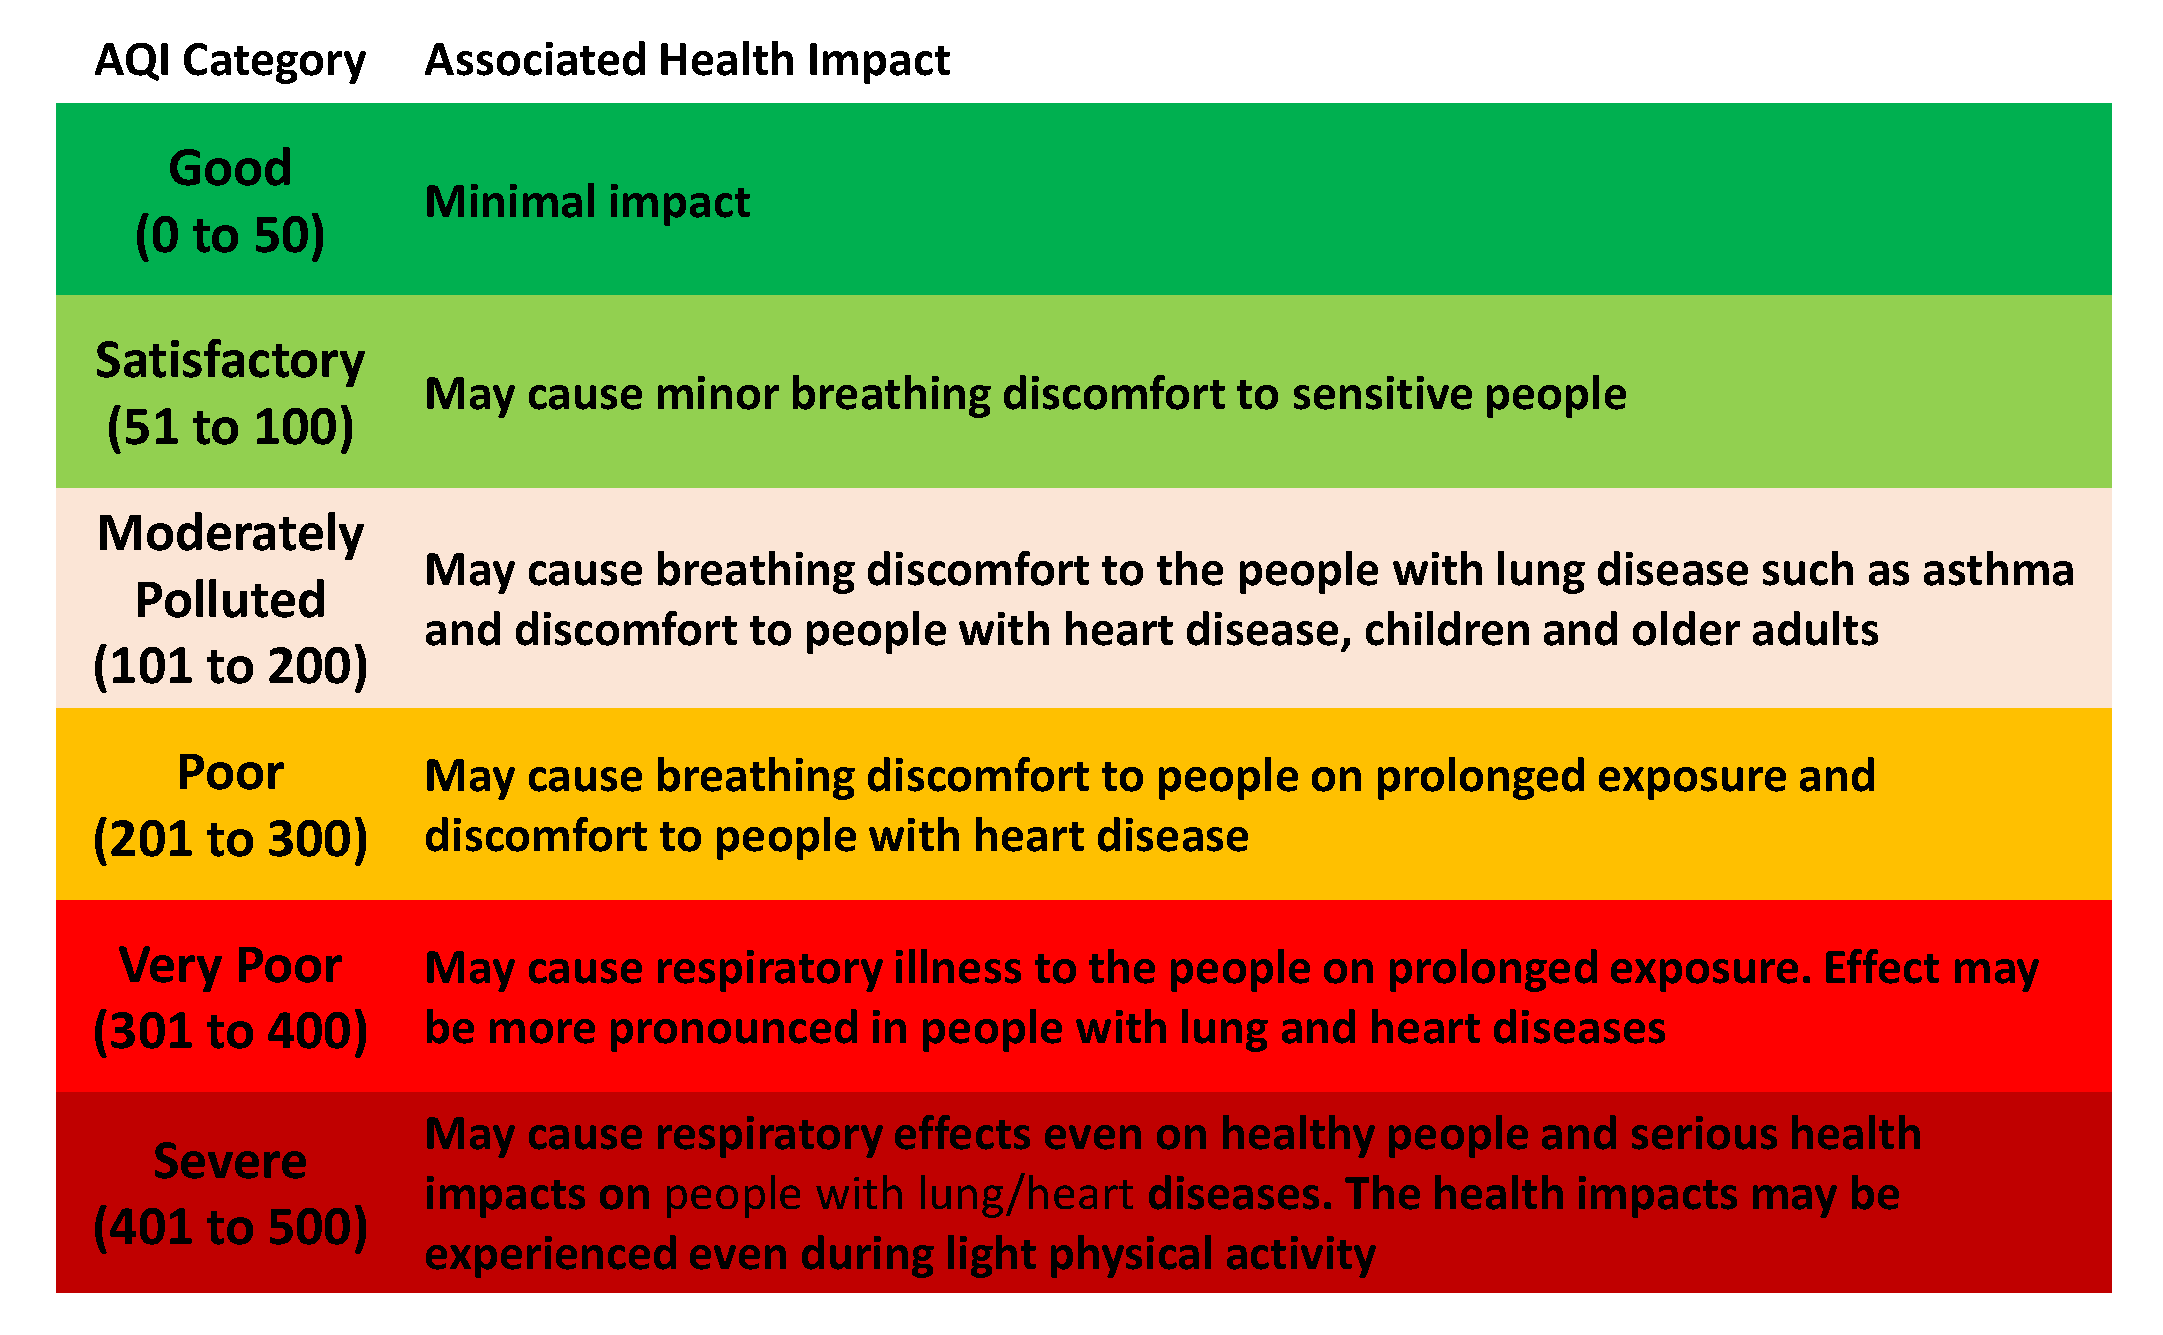

In [ ]:
from IPython import display 
display.Image("/content/drive/MyDrive/Air/IT_airquality.png",width = 600, height = 450)

In [ ]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN
df_class["AQI_bucket_calculated"] = df_class["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
df_class[~df_class.AQI_calculated.isna()].tail(2)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,AQI_calculated,AQI_bucket_calculated
707874,15.75,63.0,1.02,28.90,16.00,3.8,0.49,0.75,15.82,25.0,63.0,0.0,20.0,0.75,0.0,15.0,63.0,Satisfactory
707875,15.00,66.0,0.40,26.85,14.05,5.2,0.59,2.10,17.05,25.0,66.0,2.5,17.5,1.25,0.0,17.0,66.0,Satisfactory


In [ ]:
#Counts of values present in AQI_Range columns
df_class["AQI_bucket_calculated"].value_counts()

Moderate        390338
Satisfactory    136658
Very Poor        73473
Good             66779
Poor             40628
Name: AQI_bucket_calculated, dtype: int64

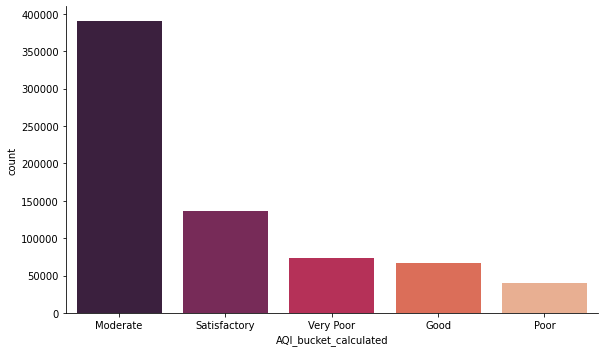

In [ ]:
#Plot: Number of entries vs AQI_Bucket Catogory
sns.catplot(x="AQI_bucket_calculated", kind="count", palette="rocket", height=5, aspect=1.7, order=df_class["AQI_bucket_calculated"].value_counts().index, data=df_class)


#Now Train the model


In [ ]:
# #Seperate independent and dependent features
X = df_class[['PM2.5_SubIndex', 'PM10_SubIndex',	'SO2_SubIndex',	'NOx_SubIndex',	'NH3_SubIndex',	'CO_SubIndex','O3_SubIndex']]
Y = df_class['AQI_calculated']

In [ ]:
X.head()

,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
0,123.333333,112.666667,32.5,45.00,5.75,50.0,34.0
1,123.333333,112.666667,32.5,23.75,5.75,0.0,34.0
2,123.333333,112.666667,32.5,13.75,5.75,0.0,34.0
3,123.333333,112.666667,32.5,11.25,5.75,0.0,79.0
4,123.333333,112.666667,32.5,8.75,5.75,0.0,34.0


In [ ]:
Y.head()

0    123.0
1    123.0
2    123.0
3    123.0
4    123.0
Name: AQI_calculated, dtype: float64

In [ ]:
#Splitting the data for training and testing of the model
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=229353)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(495513, 7) (212363, 7) (495513,) (212363,)


#Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#predicting on train
train_pred_linear = model.predict(X_train)
#predicting on test
test_pred_linear = model.predict(X_test)

In [ ]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train,train_pred_linear)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test,test_pred_linear)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print("-"*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  18.983379381009605
RMSE TestData =  18.929673383978738
--------------------------------------------------
RSquared value on train: 0.9347040314140047
RSquared value on test: 0.9349467271870704


In [ ]:
model.predict([[43.333333, 56.0, 3.75, 13.75, 1.00, 0.0, 27.0]])

array([63.71694391])

In [ ]:
# import joblib
# import numpy as np
# model=joblib.load('linear_regression_model.pkl')

In [ ]:
import pickle

# Load the pickled Linear Regression model from file
with open('linear_regression_model.pkl', 'wb') as f:
    # model = pickle.load(f)
    pickle.dump(model,f)


#Ridge Regression

In [ ]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,Y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-378.40607792651974


In [ ]:
ridge = Ridge(alpha=0.1)

ridge.fit(X_train, Y_train)

train_pred_ridge = ridge.predict(X_train)
test_pred_ridge = ridge.predict(X_test)

ridge_RMSE_train = np.sqrt(metrics.mean_squared_error(Y_train, train_pred_ridge))

ridge_RMSE_test = np.sqrt(metrics.mean_squared_error(Y_test, test_pred_ridge))


print("RMSE Training Data = ", ridge_RMSE_train)
print("RMSE Test Data = ", ridge_RMSE_test)

print("-"*50)
train_r2 = ridge.score(X_train, Y_train)
test_r2 = ridge.score(X_test, Y_test)

print("R-squared value on train:", train_r2)
print("R-squared value on test:", test_r2)

RMSE Training Data =  18.9833793810096
RMSE Test Data =  18.929673384001166
--------------------------------------------------
R-squared value on train: 0.9347040314140048
R-squared value on test: 0.9349467271869163


#Lasso Regression

In [ ]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,Y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-15}
-378.40607792651065


In [ ]:
lasso = Lasso(alpha=0.1)

lasso.fit(X_train, Y_train)

train_pred_lasso = lasso.predict(X_train)
test_pred_lasso = lasso.predict(X_test)

lasso_RMSE_train = np.sqrt(metrics.mean_squared_error(Y_train, train_pred_lasso))

lasso_RMSE_test = np.sqrt(metrics.mean_squared_error(Y_test, test_pred_lasso))

print("RMSE Training Data = ", lasso_RMSE_train)
print("RMSE Test Data = ", lasso_RMSE_test)
print("-"*50)
train_r2 = lasso.score(X_train, Y_train)
test_r2 = lasso.score(X_test, Y_test)

print("R-squared value on train:", train_r2)
print("R-squared value on test:", test_r2)

RMSE Training Data =  18.983431503063162
RMSE Test Data =  18.929686572824302
--------------------------------------------------
R-squared value on train: 0.9347036728514353
R-squared value on test: 0.9349466365380825


#Random Forest Regressor

In [ ]:
# RF = RandomForestRegressor().fit(X_train,Y_train)

In [ ]:
# #predicting on train
# train_pred_RFR = RF.predict(X_train)
# #predicting on test
# test_pred_RFR = RF.predict(X_test)

In [ ]:
# RF_RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train,train_pred_RFR)))
# RF_RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test,test_pred_RFR)))
# print("RMSE TrainingData = ",str(RF_RMSE_train))
# print("RMSE TestData = ",str(RF_RMSE_test))
# print("-"*50)
# print('RSquared value on train:',RF.score(X_train, Y_train))
# print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.016574902826894413
RMSE TestData =  0.05813351335701419
--------------------------------------------------
RSquared value on train: 0.9999999502215584
RSquared value on test: 0.9999993864696504


#Classification Model

In [ ]:
#Splitting the data into independent and dependent features for Classification
X1 = df_class[['PM2.5_SubIndex', 'PM10_SubIndex',	'SO2_SubIndex',	'NOx_SubIndex',	'NH3_SubIndex',	'CO_SubIndex','O3_SubIndex']]
Y1 = df_class['AQI_bucket_calculated']

In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X1, Y1, test_size=0.3, random_state=229353)

#Logistic Regression

In [ ]:
# # Fit the model on train data
# log_reg = LogisticRegression().fit(X_train2, Y_train2)

# #predict on train
# train_pred2 = log_reg.predict(X_train2)
# #accuracy on train
# print("Model accuracy on train is: ", accuracy_score(Y_train2, train_pred2))

# #predict on test
# test_pred2 = log_reg.predict(X_test2)
# #accuracy on test
# print("Model accuracy on test is: ", accuracy_score(Y_test2, test_pred2))

# #Kappa Score
# print("KappaScore is: ", metrics.cohen_kappa_score(Y_test2, test_pred2))

Model accuracy on train is:  0.6373455388657815
Model accuracy on test is:  0.634569110438259
KappaScore is:  0.49256858626909605


In [ ]:
# log_reg.predict([[45.00,16.25,30.00,2.50,0.0,27.0]])

array(['Satisfactory'], dtype=object)

In [ ]:
# log_reg.predict([[25.00,3.75,40.00,1.25,0.0,14.0]])

array(['Satisfactory'], dtype=object)

#Decision Tree Classifier

In [ ]:
# # Fit the model on train data
# DT2 = DecisionTreeClassifier().fit(X_train2, Y_train2)

# #predict on train
# train_pred4 = DT2.predict(X_train2)
# #accuracy on train
# print("Model accuracy on train is: ", accuracy_score(Y_train2, train_pred4))

# #predict on test
# test_pred4 = DT2.predict(X_test2)
# #accuracy on test
# print("Model accuracy on test is: ", accuracy_score(Y_test2, test_pred4))

# #Kappa Score
# print("KappaScore is: ", metrics.cohen_kappa_score(Y_test2, test_pred4))

Model accuracy on train is:  1.0
Model accuracy on test is:  1.0
KappaScore is:  1.0






#KNearestNeighbors Model

In [ ]:
# Fit the model on train data
KNN = KNeighborsClassifier().fit(X_train2, Y_train2)

#predict on train
train_pred3 = KNN.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_pred3))

#predict on test
test_pred3 = KNN.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_pred3))

#Kappa Score
print("KappaScore is: ", metrics.cohen_kappa_score(Y_test2, test_pred3))

Model accuracy on train is:  0.9925834438248845
Model accuracy on test is:  0.987799192891417
KappaScore is:  0.9808012630559311


In [ ]:
KNN.predict([[25.00,50.0,3.75,40.00,1.25,0.0,14.0]])

array(['Good'], dtype=object)

In [ ]:
KNN.predict([[66.666,68.0,17.50,10.00,0.75,0.0,23.0]])

array(['Satisfactory'], dtype=object)

In [ ]:
import pickle

# Load the pickled Linear Regression model from file
with open('KNN_classifier.pkl', 'wb') as f:
    # model = pickle.load(f)
    pickle.dump(KNN,f)
